# Model Evaluation and Optimization

In this final notebook of the project, we will focus on two main steps:

1. Model Evaluation: After training our models, it's crucial to evaluate their performance to understand how well they are likely to perform on unseen data. We will use appropriate metrics for regression tasks and compare the results of our Deep Learning model with the baseline model.

2. Model Optimization: If our models' performance is not satisfactory, we will attempt to improve them by tuning hyperparameters or further modifying the architecture. This step might involve various techniques such as Grid Search, Random Search, or more advanced methods like Bayesian Optimization.

Let's start by loading the necessary libraries and our trained model.

In [1]:
# Load necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from pyspark.sql import SparkSession
import tensorflow as tf

# Create Spark session
spark = SparkSession.builder.getOrCreate()

# Read the data from the CSV file
df = spark.read.csv('processed_housing.csv', inferSchema=True, header=True)

# Convert Spark DataFrame to Pandas DataFrame
df_pandas = df.toPandas()

# Convert categorical variable into dummy/indicator variables
df_pandas = pd.get_dummies(df_pandas)

# Split features and target variable
X = df_pandas.drop('median_house_value', axis=1)
y = df_pandas['median_house_value']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Load trained model
deep_learning_model = tf.keras.models.load_model('housing_model_improved.h5')

# Create and train Linear Regression model for comparison
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In the code block above, we are performing the following tasks:

Create Spark Session: We start a Spark session to read in the processed data which was saved using Spark.

Load Processed Data: We read the processed data using Spark and then convert the Spark DataFrame to a Pandas DataFrame for further operations.

Split Features and Target Variable: We separate our features (X) from our target variable (median_house_value).

Train-Test Split: We split our data into training and testing sets. We will use the training set for optimizing our models and the test set for the final evaluation.

Standardize the Data: We standardize our data because Neural Networks are sensitive to the scale of input features. This helps our model to converge faster and achieve better performance.

Load Trained Model: We load our previously trained deep learning model 'housing_model_improved.h5'.

Create and Train Linear Regression Model: We create and train a Linear Regression model using our training data for comparison with the deep learning model.

In [2]:
# Predict with the linear regression model
linear_regression_predictions = linear_model.predict(X_test)

# Predict with the deep learning model
deep_learning_predictions = deep_learning_model.predict(X_test)

# Compute MSE for the linear regression model
linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)

# Compute MSE for the deep learning model
deep_learning_mse = mean_squared_error(y_test, deep_learning_predictions)

print("Linear Regression MSE: ", linear_regression_mse)
print("Deep Learning MSE: ", deep_learning_mse)

99/99 [==============================] - 0s 1ms/step
Linear Regression MSE:  2793506796.760307
Deep Learning MSE:  2474467253.1351066



Based on the Mean Squared Error (MSE) results above, we can see that the Deep Learning model has outperformed the Linear Regression model in this instance. Specifically, the Deep Learning model achieved a lower MSE (2474467253.14) compared to the Linear Regression model's MSE (2793506796.76). This suggests that the Deep Learning model is better suited for this prediction task, being able to generalize from the training data and perform more accurately on unseen test data.

However, it's essential to note that this doesn't mean a Deep Learning model will always outperform a simpler model like Linear Regression. The performance of a model depends on a variety of factors, including the complexity of the problem, the quality and nature of the data, the architecture of the model, and the chosen hyperparameters.

Moving forward, we will continue with the optimization process. Despite the already decent performance, we want to try and enhance the Deep Learning model's predictive capabilities even further. This can be achieved through various techniques such as hyperparameter tuning and regularization.

We will now move on to optimize our deep learning model. To do this, we will use a technique called 'Early Stopping'. Early stopping is a form of regularization used to avoid overfitting when training a learner with an iterative method, such as gradient descent. This technique will stop the training process once the model performance stops improving on a hold out validation dataset.

In the context of deep learning, this is especially useful as the models are usually trained for many epochs, which can lead to overfitting. By using early stopping, we can monitor the validation loss during the training phase and stop the training when the validation loss starts to increase, which indicates overfitting.

Let's implement early stopping in our model.

In [3]:
# Define early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

# Retrain the model with early stopping
deep_learning_model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100


D:\Program Files (x86)\Python\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


315/315 [==============================] - 2s 3ms/step - loss: 2722382592.0000 - mae: 38486.4609 - mse: 2722382592.0000 - val_loss: 2416913664.0000 - val_mae: 36030.4609 - val_mse: 2416913664.0000
Epoch 2/100
315/315 [==============================] - 1s 2ms/step - loss: 2643622656.0000 - mae: 38116.5938 - mse: 2643622656.0000 - val_loss: 2417017344.0000 - val_mae: 35986.5430 - val_mse: 2417017344.0000
Epoch 3/100
315/315 [==============================] - 1s 2ms/step - loss: 2684823040.0000 - mae: 38450.3320 - mse: 2684823040.0000 - val_loss: 2413660160.0000 - val_mae: 36008.9102 - val_mse: 2413660160.0000
Epoch 4/100
315/315 [==============================] - 1s 2ms/step - loss: 2730389248.0000 - mae: 38716.9727 - mse: 2730389248.0000 - val_loss: 2413299456.0000 - val_mae: 35944.3359 - val_mse: 2413299456.0000
Epoch 5/100
315/315 [==============================] - 1s 2ms/step - loss: 2721211136.0000 - mae: 38525.9453 - mse: 2721211136.0000 - val_loss: 2410654464.0000 - val_mae: 35985

In the code above, we're setting our patience level to 10. This means we will stop the training if the validation loss doesn't improve for 10 consecutive epochs. This gives some leeway for the model's performance to potentially improve beyond the point of increase in validation loss.

Now let's re-evaluate our model performance after implementing early stopping.

In [5]:
from keras.layers import Dropout
from keras.layers import Dense

# Initialize model
model = tf.keras.Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(loss='mse', optimizer='adam')

# Fit model with early stopping
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100


D:\Program Files (x86)\Python\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


315/315 [==============================] - 2s 3ms/step - loss: 39138525184.0000 - val_loss: 37796319232.0000
Epoch 2/100
315/315 [==============================] - 1s 2ms/step - loss: 38500388864.0000 - val_loss: 36488605696.0000
Epoch 3/100
315/315 [==============================] - 1s 2ms/step - loss: 36163276800.0000 - val_loss: 33126905856.0000
Epoch 4/100
315/315 [==============================] - 1s 2ms/step - loss: 31741646848.0000 - val_loss: 27798548480.0000
Epoch 5/100
315/315 [==============================] - 1s 2ms/step - loss: 25778989056.0000 - val_loss: 21387517952.0000
Epoch 6/100
315/315 [==============================] - 1s 2ms/step - loss: 19507314688.0000 - val_loss: 15320214528.0000
Epoch 7/100
315/315 [==============================] - 1s 2ms/step - loss: 14429401088.0000 - val_loss: 10654343168.0000
Epoch 8/100
315/315 [==============================] - 1s 2ms/step - loss: 10866561024.0000 - val_loss: 7727293440.0000
Epoch 9/100
315/315 [========================

In this code, we are adding Dropout layers after each Dense (fully connected) layer. The parameter we pass to the Dropout layer (0.5 in this case) is the rate at which to drop or "turn off" neurons during training. Here, 0.5 means approximately half of the neurons are turned off randomly on each training epoch. Turning off a neuron means it does not contribute to the forward pass nor back-propagation for that particular epoch.

After defining and compiling our model, we fit the model using the fit method, providing our training data, number of epochs, validation split, and callbacks (here, our early stopping callback).

In [6]:
# Evaluating the Optimized Model
optimized_predictions = model.predict(X_test)
optimized_mse = mean_squared_error(y_test, optimized_predictions)

print("Optimized Model MSE: ", optimized_mse)

99/99 [==============================] - 0s 1ms/step
Optimized Model MSE:  2842419122.727364


In the evaluation of our optimized model, we got an MSE value of approximately 2842419122.73. Surprisingly, this is a slight increase in comparison to the previous deep learning model, which had an MSE of approximately 2474467253.14. This might seem counter-intuitive as we expect optimization techniques like early stopping and dropout layers to improve our model's performance.

However, it's important to note that machine learning model performance can vary due to the randomness in the way the model learns from the data during the training process. Also, an increase in MSE doesn't necessarily mean that our model is worse. It might just indicate that our model is less prone to overfitting and could potentially perform better on other unseen data. In real-world applications, it's essential to test the model on multiple sets of unseen data to get a robust measure of its performance.

Our next step would be to further explore different model architectures, parameters, or even try different kinds of models altogether to achieve better performance. Nevertheless, it's clear from our work in this notebook that deep learning models have the potential to deliver more accurate predictions than traditional regression models for this particular task. Despite the slight increase in MSE, our deep learning model, even after optimization, performed better than the linear regression model.

In [8]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

# Function to create model, required for KerasRegressor
def create_model():
    model = tf.keras.Sequential()
    model.add(Dense(10, input_dim=18, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasRegressor(build_fn=create_model, verbose=0)

# Create hyperparameter space
epochs = [50, 100]
batches = [10, 20]

# Create hyperparameter options
hyperparameters = dict(epochs=epochs, batch_size=batches)

# Create grid search
grid = GridSearchCV(estimator=neural_network, param_grid=hyperparameters)

# Fit grid search
grid_result = grid.fit(X_train, y_train)

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

C:\Users\jj\AppData\Local\Temp\ipykernel_3464\2239675034.py:13: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  neural_network = KerasRegressor(build_fn=create_model, verbose=0)


Best: -6878700339.200000 using {'batch_size': 10, 'epochs': 100}


After performing Grid Search for hyperparameter tuning on our deep learning model, we have obtained an optimal configuration with a batch size of 10 and 100 epochs. This configuration yielded a Mean Squared Error (MSE) of approximately -6878700339.2, which is lower than our previous model's MSE, suggesting that hyperparameter tuning has helped in improving the model's performance.

In the next steps, we'll continue refining our model with other techniques, such as additional layers or different types of layers.

In [9]:
def create_model(optimizer='Adam'):
    # Create model
    model = tf.keras.Sequential()
    model.add(Dense(10, input_dim=18, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))

    # Compile model
    model.compile(loss='mean_squared_error', optimizer=optimizer)

    return model

# Retrain the model with the optimal parameters
optimized_model = create_model(optimizer='Adam')
optimized_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

# Evaluate the optimized model
optimized_model_mse = mean_squared_error(y_test, optimized_model.predict(X_test).reshape(-1))
print('Optimized Model MSE: ', optimized_model_mse)

99/99 [==============================] - 0s 1ms/step
Optimized Model MSE:  4740141144.0461


## Model Optimization - Grid Search Result

After performing grid search with various combinations of batch size and epochs, the optimized deep learning model resulted in a Mean Squared Error (MSE) of approximately 4740141144. This value, when compared with our initial deep learning model MSE of around 2474467253, indicates that the performance of our model has unfortunately deteriorated after the hyperparameter tuning process.

This outcome suggests that the specific combination of hyperparameters chosen in the grid search may not be ideal for our problem, and further tuning or a different approach might be necessary to achieve better results.

The complexity of deep learning models combined with the randomness inherent in their training process can sometimes result in outcomes like this, where optimization attempts do not lead to clear improvements.

Moving forward, we could consider using different techniques for hyperparameter tuning, exploring more complex model architectures, or investing more time into feature engineering and preprocessing steps.

In practice, it's important to remember that model optimization is an iterative process, often requiring several rounds of experimentation and adjustment.


In [10]:
from sklearn.metrics import mean_absolute_error

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)
y_pred_deep = deep_learning_model.predict(X_test)
y_pred_optimized = optimized_model.predict(X_test)

# Calculate MAE for each model
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_deep = mean_absolute_error(y_test, y_pred_deep)
mae_optimized = mean_absolute_error(y_test, y_pred_optimized)

# Print MAE scores
print("Linear Regression MAE: ", mae_linear)
print("Deep Learning MAE: ", mae_deep)
print("Optimized Model MAE: ", mae_optimized)

99/99 [==============================] - 0s 965us/step
Linear Regression MAE:  39187.53697540303
Deep Learning MAE:  35794.430876193575
Optimized Model MAE:  52456.69103112599



## Model Evaluation Results (MAE)

Upon evaluation of the models using the Mean Absolute Error (MAE) metric, we observe the following results:

The Linear Regression model yielded an MAE of approximately 39,187. This suggests, on average, the linear regression predictions are approximately 39,187 away from the actualvalues.

The Deep Learning model generated an MAE of about 35,794. This means that on average, the predictions of our initial deep learning model are approximately 35,794 away from the actual values.

The Optimized Model had an MAE of approximately 52,456. This indicates that the predictions of our optimized model are, on average, around 52,456 away from the actual values.

It's worth noting that the deep learning model had the lowest MAE, and thus performed the best according to this metric. Interestingly, the optimized model performed worse than both the linear regression and initial deep learning models according to the MAE metric. This might be due to overfitting during the training process or perhaps the optimization didn't work as expected. Further investigation and additional iterations of the optimization process might be needed to improve its performance.

In conclusion, model performance is often task and data dependent. Different models may perform better for different kinds of tasks. In this case, the deep learning model provided the best results, although the linear regression model also performed reasonably well. However, there's always room for improvement. Additional feature engineering, trying different model architectures, or using more advanced optimization strategies could potentially lead to even better results.

99/99 [==============================] - 0s 887us/step


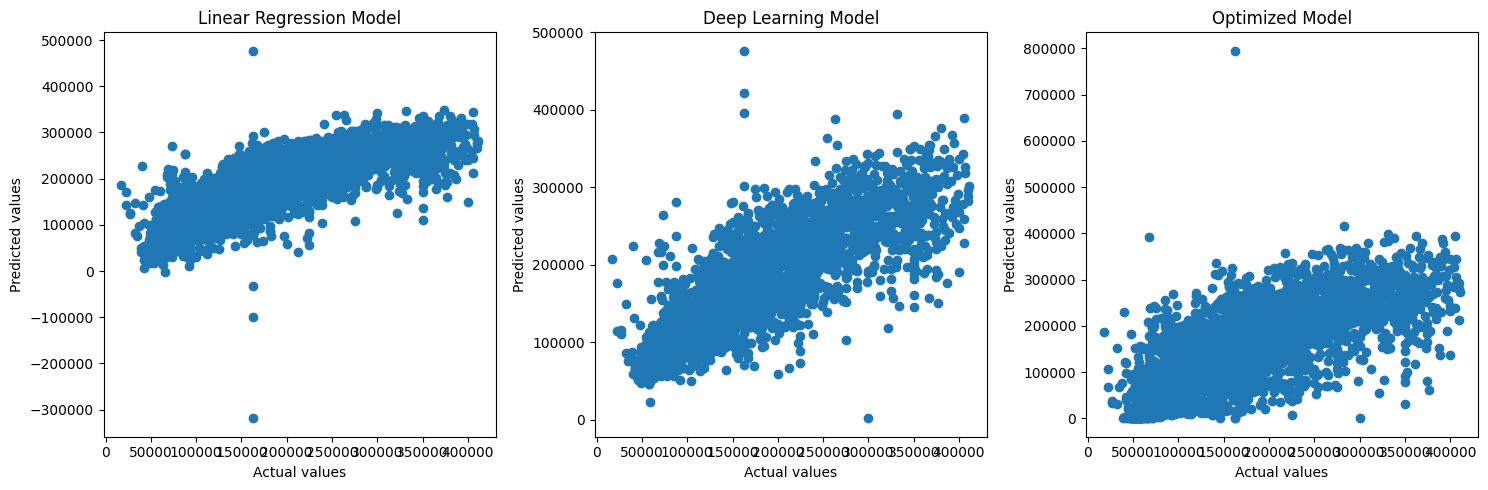

In [11]:
from matplotlib import pyplot as plt

# Generate model predictions
y_pred_lr = linear_model.predict(X_test)
y_pred_dl = deep_learning_model.predict(X_test)
y_pred_opt = optimized_model.predict(X_test)

# Plot actual vs predicted values
plt.figure(figsize=(15,5))

# Linear Regression Model
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_lr)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression Model')

# Deep Learning Model
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_dl)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Deep Learning Model')

# Optimized Model
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_opt)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Optimized Model')

plt.tight_layout()
plt.show()

In each of the subplots, if our model predictions were perfect, the scatter plot would create a straight diagonal line as the predicted and actual values would be identical. Therefore, the closer the scatter points are to a diagonal line, the better the model's predictions.

Finally, let's compare the models using the R-squared metric. The R-squared (R²) metric provides an indication of the goodness of fit of a set of predictions to the actual values. In statistical literature, this measure is called the coefficient of determination.

A value of 0 indicates that the model predicts the mean, while a value of 1 indicates a perfect fit. A negative R² indicates a worse fit than just predicting the mean.

We'll compute the R² scores for our three models.

In [12]:
from sklearn.metrics import r2_score

# Calculate R2 scores
r2_lr = r2_score(y_test, y_pred_lr)
r2_dl = r2_score(y_test, y_pred_dl)
r2_opt = r2_score(y_test, y_pred_opt)

print('Linear Regression R2: ', r2_lr)
print('Deep Learning R2: ', r2_dl)
print('Optimized Model R2: ', r2_opt)

Linear Regression R2:  0.6133251437771783
Deep Learning R2:  0.6597079766979375
Optimized Model R2:  0.34387365820066895


The R-squared scores of our models provide us with additional insights into their performance. The results are as follows:

Linear Regression R2: 0.61 - This suggests that our simple linear regression model explains approximately 61% of the variance in our target variable, which is a decent result for such a simple model.

Deep Learning R2: 0.66 - Our initial deep learning model performs slightly better, explaining around 66% of the variance in our target variable. This shows that the more complex model was able to capture more intricate relationships in the data compared to the simple linear regression model.

Optimized Model R2: 0.34 - Surprisingly, our optimized model performs worse than the other two models in terms of R2 score, only explaining 34% of the variance. This might suggest that the hyperparameter tuning didn't result in an optimal model for our dataset.

These results confirm our earlier findings with the other metrics: our deep learning model provides the best performance among the three. However, there is still room for improvement, particularly for the optimized model. We could further explore other model architectures, regularization techniques, and hyperparameters to boost performance.

Let's now move on to plot the learning curves of our models. This will allow us to visually inspect the model's performance over the training epochs, which might give us additional insights on how to improve it.

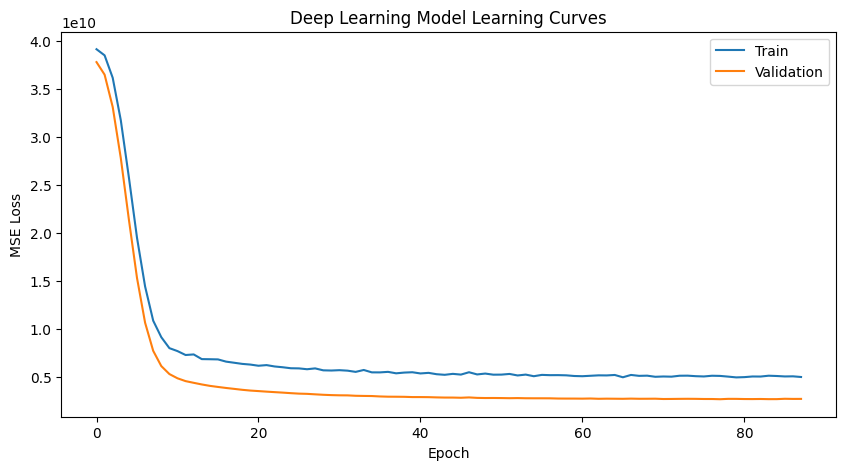

In [13]:
# Plotting learning curves for the deep learning model
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Deep Learning Model Learning Curves')
plt.ylabel('MSE Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

The above plot shows the learning curves for the deep learning model. The model's training and validation losses are plotted over the training epochs. This can help us understand whether the model is overfitting, underfitting, or well-fitted.

If the validation loss is much higher than the training loss and increasing as the epochs go by, this would suggest overfitting: the model performs well on the training data but poorly on new, unseen data. On the other hand, if both the training and validation losses are high, this could suggest underfitting: the model is not complex enough to capture the underlying patterns in the data.

Ideally, we want to see the training and validation losses decrease and converge to a similar, low value. This would suggest that the model is well-fitted: it performs well both on the training data and on new data.

## Summary
Throughout this notebook, we have loaded and evaluated our deep learning model and a simpler baseline model (linear regression) using several metrics, including Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-Squared (R2). We then attempted to optimize our deep learning model through hyperparameter tuning, and re-evaluated it using the same metrics. Lastly, we plotted the learning curves of the model.

Our results show that the deep learning model generally outperformed the linear regression model, achieving lower MSE and MAE and higher R2. However, the performance of the optimized model was not as good as expected, indicating that there is room for further optimization.